In [2]:
import numpy as np
import matplotlib.pyplot as plt
from test_cases import *
import sklearn
import sklearn.datasets

from utils import plot_decision_boundary, sigmoid, load_dataset, load_extra_datasets

%matplotlib inline

In [3]:
np.random.seed(14)

In [15]:
# Get the flower dataset
X, y = load_dataset()

print(X.shape,y.shape)


(2, 400) (1, 400)


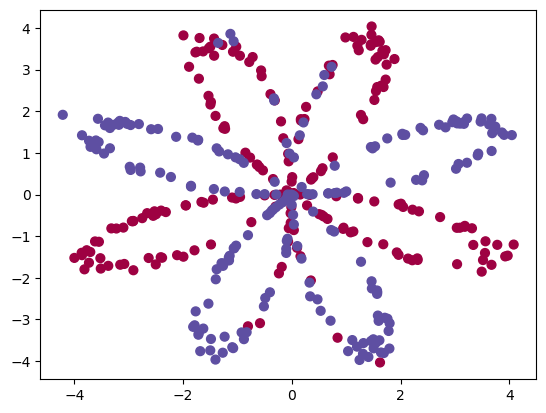

In [16]:
plt.scatter(X[0, :], X[1, :], c=y, s=40, cmap=plt.cm.Spectral);

In [5]:
# 2 layer neural network
def compute_layer_size_from_data(x_, y_):
    n_0 = x_.shape[0]
    n_2 = y_.shape[0]
    
    return n_0, n_2


In [6]:
sample_n_0, sample_n_1 = compute_layer_size_from_data(X,y)
print(sample_n_0, sample_n_1)

2 1


In [13]:
def initialize_parameters(n_0, n_1, n_2):
    w1 = np.random.randn(n_1, n_0) * 0.01
    b1 = np.zeros((n_1,1))
    
    w2 = np.random.randn(n_2, n_1) * 0.01
    b2 = np.zeros((n_2,1))
    
    assert(w1.shape == (n_1, n_0))
    assert(b1.shape == (n_1, 1))
    assert(w2.shape == (n_2, n_1))
    assert(b2.shape == (n_2, 1))
    
    return {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }

In [14]:
sample_params = initialize_parameters(sample_n_0, 4, sample_n_1)
print(sample_params)

{'w1': array([[ 0.01152599, -0.00224236],
       [-0.00326061, -0.00030911],
       [ 0.00355717,  0.00849587],
       [-0.00122154, -0.00680852]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'w2': array([[-0.01067877, -0.00076679,  0.00572963,  0.00457947]]), 'b2': array([[0.]])}


In [27]:
def forward_propogation(x_, params):
    w1 = params["w1"]
    b1 = params["b1"]
    
    w2 = params["w2"]
    b2 = params["b2"]
    
    # compute forward pass values in order
    z1 = np.dot(w1, x_) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))
    
    forward_params_cache = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2
    }
    assert(a2.shape == (1, x_.shape[1]))
    return a2, forward_params_cache


In [31]:
sample_a2, sample_forward_params = forward_propogation(X, sample_params)
print(sample_a2.shape)
print(np.mean(sample_forward_params["a2"]), np.mean(sample_forward_params["z2"]), 
                                                   np.mean(sample_forward_params["a1"]), 
                                                           np.mean(sample_forward_params["z1"]))

(1, 400)
0.5000018596487178 7.438594959662014e-06 -0.00012964123861792693 -0.0001296898827466104


In [25]:
def backward_propogation(params, forward_params_cache, x_, y_):
    a1 = forward_params_cache["a1"]
    z1 = forward_params_cache["z1"]
    a2 = forward_params_cache["a2"]
    z2 = forward_params_cache["z2"]
    
    w1 = params["w1"]
    b1 = params["b1"]
    w2 = params["w2"]
    b2 = params["b2"]
    
    m = x_.shape[1]
    dz2 = np.subtract(a2, y_)
    dw2 = (1/m) * np.dot(dz2, a1.T)
    dz1 = np.dot(w2.T, dz2) * (1 - np.power(a1, 2))
    dw1 = (1/m) * np.dot(dz1, x_.T)
    
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    
    return {
        "dw1": dw1,
        "dw2": dw2,
        "db1": db1,
        "db2": db2
    }


In [36]:
sample_gradient_params = backward_propogation(sample_params, sample_forward_params, X, y)
print(sample_gradient_params)

{'dw1': array([[ 2.42193376e-04, -2.10539712e-03],
       [ 1.73739312e-05, -1.51081068e-04],
       [-1.29411704e-04,  1.12736702e-03],
       [-1.03693595e-04,  9.01443413e-04]]), 'dw2': array([[-7.03174299e-04,  1.29898259e-05,  1.59257860e-03,
        -1.31332609e-03]]), 'db1': array([[-1.77761220e-07],
       [-1.85653146e-09],
       [ 8.76687111e-09],
       [ 1.53441035e-08]]), 'db2': array([[1.85964872e-06]])}


In [32]:
def cost_function(a2, y_):
    log_prob = (y_ * np.log(a2)) + ((1-y_) * np.log(1-a2))
    total_cost = -np.mean(log_prob)
    total_cost = np.squeeze(total_cost)   # turns [[a]] type value to a
    
    assert(isinstance(total_cost, float)) # makes sure that the value is float
    
    return total_cost


In [33]:
print(cost_function(sample_a2, y))

0.6931577839678628


In [34]:
def update_parameters(params, gradients, learning_rate):
    w1 = params["w1"]
    b1 = params["b1"]
    w2 = params["w2"]
    b2 = params["b2"]
    
    dw1 = gradients["dw1"]
    db1 = gradients["db1"]
    dw2 = gradients["dw2"]
    db2 = gradients["db2"]
    
    # update rule
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    
    # return updated parameters
    return {
        "w1": w1,
        "w2": w2,
        "b1": b1,
        "b2": b2
    }

In [39]:
sample_updated_params = update_parameters(sample_params, sample_gradient_params, 1.2)
print(sample_updated_params)

{'w1': array([[ 0.01123536,  0.00028412],
       [-0.00328146, -0.00012782],
       [ 0.00371247,  0.00714303],
       [-0.00109711, -0.00789025]]), 'w2': array([[-0.00983496, -0.00078238,  0.00381853,  0.00615546]]), 'b1': array([[ 2.13313464e-07],
       [ 2.22783775e-09],
       [-1.05202453e-08],
       [-1.84129242e-08]]), 'b2': array([[-2.23157846e-06]])}


In [42]:
def model(x_, y_, n_1, n_iterations, print_cost = False):
    n_0, n_2 = compute_layer_size_from_data(X, y)
    
    # initialize parameters
    params = initialize_parameters(n_0, n_1, n_2)
    W1 = params["w1"]
    B1 = params["b1"]
    W2 = params["w2"]
    B2 = params["b2"]
    
    for i in range(n_iterations):
        A2, forward_params_cache = forward_propogation(X, params)
        gradient_of_params = backward_propogation(params, forward_params_cache, X, y)
        
        params = update_parameters(params, gradient_of_params, 1.2)
        
        if print_cost and i%1000:
            print(f"Cost at iteration {i} is {cost_function(A2, y)}")
    
    return params
    

In [43]:
sample_trained_params = model(X, y, 4, 10000, print_cost=True)
print(sample_trained_params)

Cost at iteration 1 is 0.6931348424771356
Cost at iteration 2 is 0.6931244142994393
Cost at iteration 3 is 0.69311006729656
Cost at iteration 4 is 0.6930890516433982
Cost at iteration 5 is 0.6930574662151133
Cost at iteration 6 is 0.693009562613434
Cost at iteration 7 is 0.6929367793189946
Cost at iteration 8 is 0.6928264064795093
Cost at iteration 9 is 0.6926598179415916
Cost at iteration 10 is 0.6924103457271766
Cost at iteration 11 is 0.6920412373685781
Cost at iteration 12 is 0.6915049098461244
Cost at iteration 13 is 0.690746002933042
Cost at iteration 14 is 0.6897120849830575
Cost at iteration 15 is 0.6883752986047981
Cost at iteration 16 is 0.6867619667489149
Cost at iteration 17 is 0.6849738225903395
Cost at iteration 18 is 0.68317514111522
Cost at iteration 19 is 0.6815368166012721
Cost at iteration 20 is 0.6801693953671643
Cost at iteration 21 is 0.6790941432021796
Cost at iteration 22 is 0.6782653571364625
Cost at iteration 23 is 0.6776137369034652
Cost at iteration 24 is 0.

Cost at iteration 992 is 0.2814577734234852
Cost at iteration 993 is 0.28143901679687316
Cost at iteration 994 is 0.2814202846419262
Cost at iteration 995 is 0.28140157687957235
Cost at iteration 996 is 0.2813828934311461
Cost at iteration 997 is 0.2813642342183859
Cost at iteration 998 is 0.28134559916343177
Cost at iteration 999 is 0.28132698818882224
Cost at iteration 1001 is 0.28128983817277137
Cost at iteration 1002 is 0.28127129897837905
Cost at iteration 1003 is 0.2812527835584245
Cost at iteration 1004 is 0.2812342918374032
Cost at iteration 1005 is 0.2812158237401945
Cost at iteration 1006 is 0.28119737919205917
Cost at iteration 1007 is 0.2811789581186373
Cost at iteration 1008 is 0.2811605604459457
Cost at iteration 1009 is 0.28114218610037517
Cost at iteration 1010 is 0.28112383500868887
Cost at iteration 1011 is 0.2811055070980193
Cost at iteration 1012 is 0.28108720229586653
Cost at iteration 1013 is 0.2810689205300955
Cost at iteration 1014 is 0.2810506617289336
Cost at 

Cost at iteration 2239 is 0.266998430157948
Cost at iteration 2240 is 0.2669906399586948
Cost at iteration 2241 is 0.2669828534914961
Cost at iteration 2242 is 0.2669750707536599
Cost at iteration 2243 is 0.26696729174249806
Cost at iteration 2244 is 0.2669595164553259
Cost at iteration 2245 is 0.26695174488946277
Cost at iteration 2246 is 0.2669439770422315
Cost at iteration 2247 is 0.26693621291095865
Cost at iteration 2248 is 0.2669284524929745
Cost at iteration 2249 is 0.2669206957856131
Cost at iteration 2250 is 0.26691294278621186
Cost at iteration 2251 is 0.26690519349211217
Cost at iteration 2252 is 0.26689744790065895
Cost at iteration 2253 is 0.2668897060092008
Cost at iteration 2254 is 0.26688196781508977
Cost at iteration 2255 is 0.2668742333156818
Cost at iteration 2256 is 0.2668665025083361
Cost at iteration 2257 is 0.26685877539041575
Cost at iteration 2258 is 0.26685105195928754
Cost at iteration 2259 is 0.2668433322123215
Cost at iteration 2260 is 0.26683561614689133
C

Cost at iteration 3490 is 0.25952920196136275
Cost at iteration 3491 is 0.25952466089971465
Cost at iteration 3492 is 0.25952012162699317
Cost at iteration 3493 is 0.25951558414225157
Cost at iteration 3494 is 0.25951104844454337
Cost at iteration 3495 is 0.2595065145329229
Cost at iteration 3496 is 0.2595019824064449
Cost at iteration 3497 is 0.25949745206416486
Cost at iteration 3498 is 0.2594929235051388
Cost at iteration 3499 is 0.25948839672842344
Cost at iteration 3500 is 0.25948387173307585
Cost at iteration 3501 is 0.25947934851815396
Cost at iteration 3502 is 0.259474827082716
Cost at iteration 3503 is 0.25947030742582117
Cost at iteration 3504 is 0.25946578954652894
Cost at iteration 3505 is 0.25946127344389947
Cost at iteration 3506 is 0.25945675911699356
Cost at iteration 3507 is 0.2594522465648725
Cost at iteration 3508 is 0.2594477357865983
Cost at iteration 3509 is 0.25944322678123344
Cost at iteration 3510 is 0.259438719547841
Cost at iteration 3511 is 0.259434214085484

Cost at iteration 4720 is 0.2550508904003619
Cost at iteration 4721 is 0.25504798472764484
Cost at iteration 4722 is 0.25504508002490267
Cost at iteration 4723 is 0.25504217629168385
Cost at iteration 4724 is 0.25503927352753736
Cost at iteration 4725 is 0.2550363717320122
Cost at iteration 4726 is 0.2550334709046579
Cost at iteration 4727 is 0.2550305710450239
Cost at iteration 4728 is 0.25502767215266026
Cost at iteration 4729 is 0.25502477422711706
Cost at iteration 4730 is 0.25502187726794473
Cost at iteration 4731 is 0.2550189812746939
Cost at iteration 4732 is 0.2550160862469156
Cost at iteration 4733 is 0.25501319218416085
Cost at iteration 4734 is 0.2550102990859813
Cost at iteration 4735 is 0.2550074069519285
Cost at iteration 4736 is 0.2550045157815545
Cost at iteration 4737 is 0.2550016255744114
Cost at iteration 4738 is 0.25499873633005193
Cost at iteration 4739 is 0.25499584804802866
Cost at iteration 4740 is 0.25499296072789457
Cost at iteration 4741 is 0.2549900743692029

Cost at iteration 6004 is 0.25198514607732597
Cost at iteration 6005 is 0.25198318940916026
Cost at iteration 6006 is 0.251981233296967
Cost at iteration 6007 is 0.25197927774052215
Cost at iteration 6008 is 0.25197732273960166
Cost at iteration 6009 is 0.2519753682939817
Cost at iteration 6010 is 0.25197341440343846
Cost at iteration 6011 is 0.25197146106774837
Cost at iteration 6012 is 0.25196950828668774
Cost at iteration 6013 is 0.2519675560600331
Cost at iteration 6014 is 0.2519656043875614
Cost at iteration 6015 is 0.2519636532690491
Cost at iteration 6016 is 0.2519617027042733
Cost at iteration 6017 is 0.251959752693011
Cost at iteration 6018 is 0.2519578032350393
Cost at iteration 6019 is 0.25195585433013556
Cost at iteration 6020 is 0.25195390597807693
Cost at iteration 6021 is 0.251951958178641
Cost at iteration 6022 is 0.2519500109316055
Cost at iteration 6023 is 0.25194806423674787
Cost at iteration 6024 is 0.2519461180938461
Cost at iteration 6025 is 0.2519441725026781
Cos

Cost at iteration 7250 is 0.24991622178698233
Cost at iteration 7251 is 0.24991481492594436
Cost at iteration 7252 is 0.2499134084120501
Cost at iteration 7253 is 0.2499120022451764
Cost at iteration 7254 is 0.24991059642520036
Cost at iteration 7255 is 0.2499091909519988
Cost at iteration 7256 is 0.24990778582544876
Cost at iteration 7257 is 0.24990638104542737
Cost at iteration 7258 is 0.2499049766118118
Cost at iteration 7259 is 0.24990357252447917
Cost at iteration 7260 is 0.24990216878330684
Cost at iteration 7261 is 0.24990076538817207
Cost at iteration 7262 is 0.24989936233895219
Cost at iteration 7263 is 0.24989795963552464
Cost at iteration 7264 is 0.24989655727776697
Cost at iteration 7265 is 0.24989515526555656
Cost at iteration 7266 is 0.24989375359877117
Cost at iteration 7267 is 0.24989235227728834
Cost at iteration 7268 is 0.24989095130098576
Cost at iteration 7269 is 0.24988955066974122
Cost at iteration 7270 is 0.2498881503834326
Cost at iteration 7271 is 0.24988675044

Cost at iteration 8304 is 0.24860461427946628
Cost at iteration 8305 is 0.24860351440790815
Cost at iteration 8306 is 0.24860241477944978
Cost at iteration 8307 is 0.24860131539401287
Cost at iteration 8308 is 0.2486002162515191
Cost at iteration 8309 is 0.24859911735189008
Cost at iteration 8310 is 0.2485980186950476
Cost at iteration 8311 is 0.24859692028091346
Cost at iteration 8312 is 0.24859582210940942
Cost at iteration 8313 is 0.24859472418045725
Cost at iteration 8314 is 0.2485936264939789
Cost at iteration 8315 is 0.24859252904989623
Cost at iteration 8316 is 0.24859143184813115
Cost at iteration 8317 is 0.2485903348886056
Cost at iteration 8318 is 0.24858923817124165
Cost at iteration 8319 is 0.24858814169596116
Cost at iteration 8320 is 0.24858704546268634
Cost at iteration 8321 is 0.2485859494713392
Cost at iteration 8322 is 0.2485848537218419
Cost at iteration 8323 is 0.24858375821411646
Cost at iteration 8324 is 0.24858266294808523
Cost at iteration 8325 is 0.248581567923

Cost at iteration 9588 is 0.24736822560184987
Cost at iteration 9589 is 0.24736738300499847
Cost at iteration 9590 is 0.24736654057222496
Cost at iteration 9591 is 0.2473656983034815
Cost at iteration 9592 is 0.24736485619872042
Cost at iteration 9593 is 0.24736401425789392
Cost at iteration 9594 is 0.24736317248095424
Cost at iteration 9595 is 0.24736233086785375
Cost at iteration 9596 is 0.24736148941854466
Cost at iteration 9597 is 0.24736064813297942
Cost at iteration 9598 is 0.24735980701111038
Cost at iteration 9599 is 0.2473589660528897
Cost at iteration 9600 is 0.24735812525827008
Cost at iteration 9601 is 0.2473572846272036
Cost at iteration 9602 is 0.24735644415964286
Cost at iteration 9603 is 0.24735560385554023
Cost at iteration 9604 is 0.24735476371484816
Cost at iteration 9605 is 0.24735392373751913
Cost at iteration 9606 is 0.2473530839235057
Cost at iteration 9607 is 0.2473522442727602
Cost at iteration 9608 is 0.24735140478523532
Cost at iteration 9609 is 0.24735056546

In [44]:
def predict(params, x_):
    A2, forward_prop_params = forward_propogation(x_, params)
    predictions = np.where(A2 >= 0.5, 1, np.where(A2 < 0.5, 0, A2))
    
    return predictions

In [45]:
sample_predictions = predict(sample_trained_params, X)
print(sample_predictions)

[[0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.
  1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [47]:
print ('Accuracy: %d' % float((np.dot(y,sample_predictions.T) + np.dot(1-y,1-sample_predictions.T))
                              /float(y.size)*100) + '%')

Accuracy: 91%


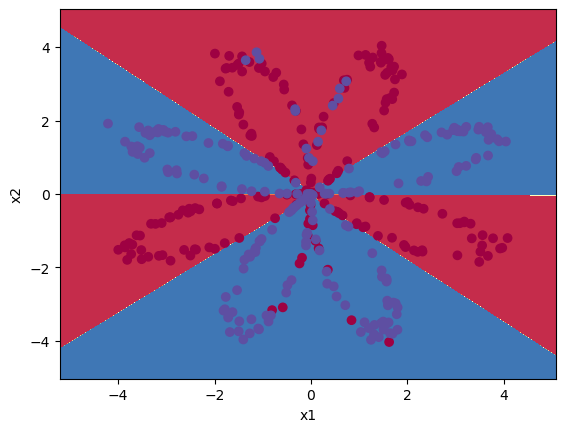

In [49]:
plot_decision_boundary(lambda x: predict(sample_trained_params, x.T), X, y)

In [50]:
hidden_layer_size = [1, 2, 4, 5, 10, 20, 40]

def cross_validation_layer_size(h_l_size, x_, y_):
    plt.figure(figsize=(16, 32))
    for i, n_h in enumerate(h_l_size):
        plt.subplot(5, 2, i+1)
        plt.title(f"hidden layer of size: {n_h}")
        params = model(x_, y_, n_h, 4000)
        plot_decision_boundary(lambda x: predict(params, x.T), x_, y_)
        predictions = predict(params, x_)
        accuracy = float((np.dot(y_,predictions.T) + np.dot(1-y_,1-predictions.T))
                              /float(y_.size)*100)
        print(f"Accuracy for the {n_h} layer predictions is: {accuracy} %")
        

Accuracy for the 1 layer predictions is: 67.25 %
Accuracy for the 2 layer predictions is: 67.0 %
Accuracy for the 4 layer predictions is: 90.25 %
Accuracy for the 5 layer predictions is: 91.0 %
Accuracy for the 10 layer predictions is: 90.75 %
Accuracy for the 20 layer predictions is: 90.75 %
Accuracy for the 40 layer predictions is: 91.25 %


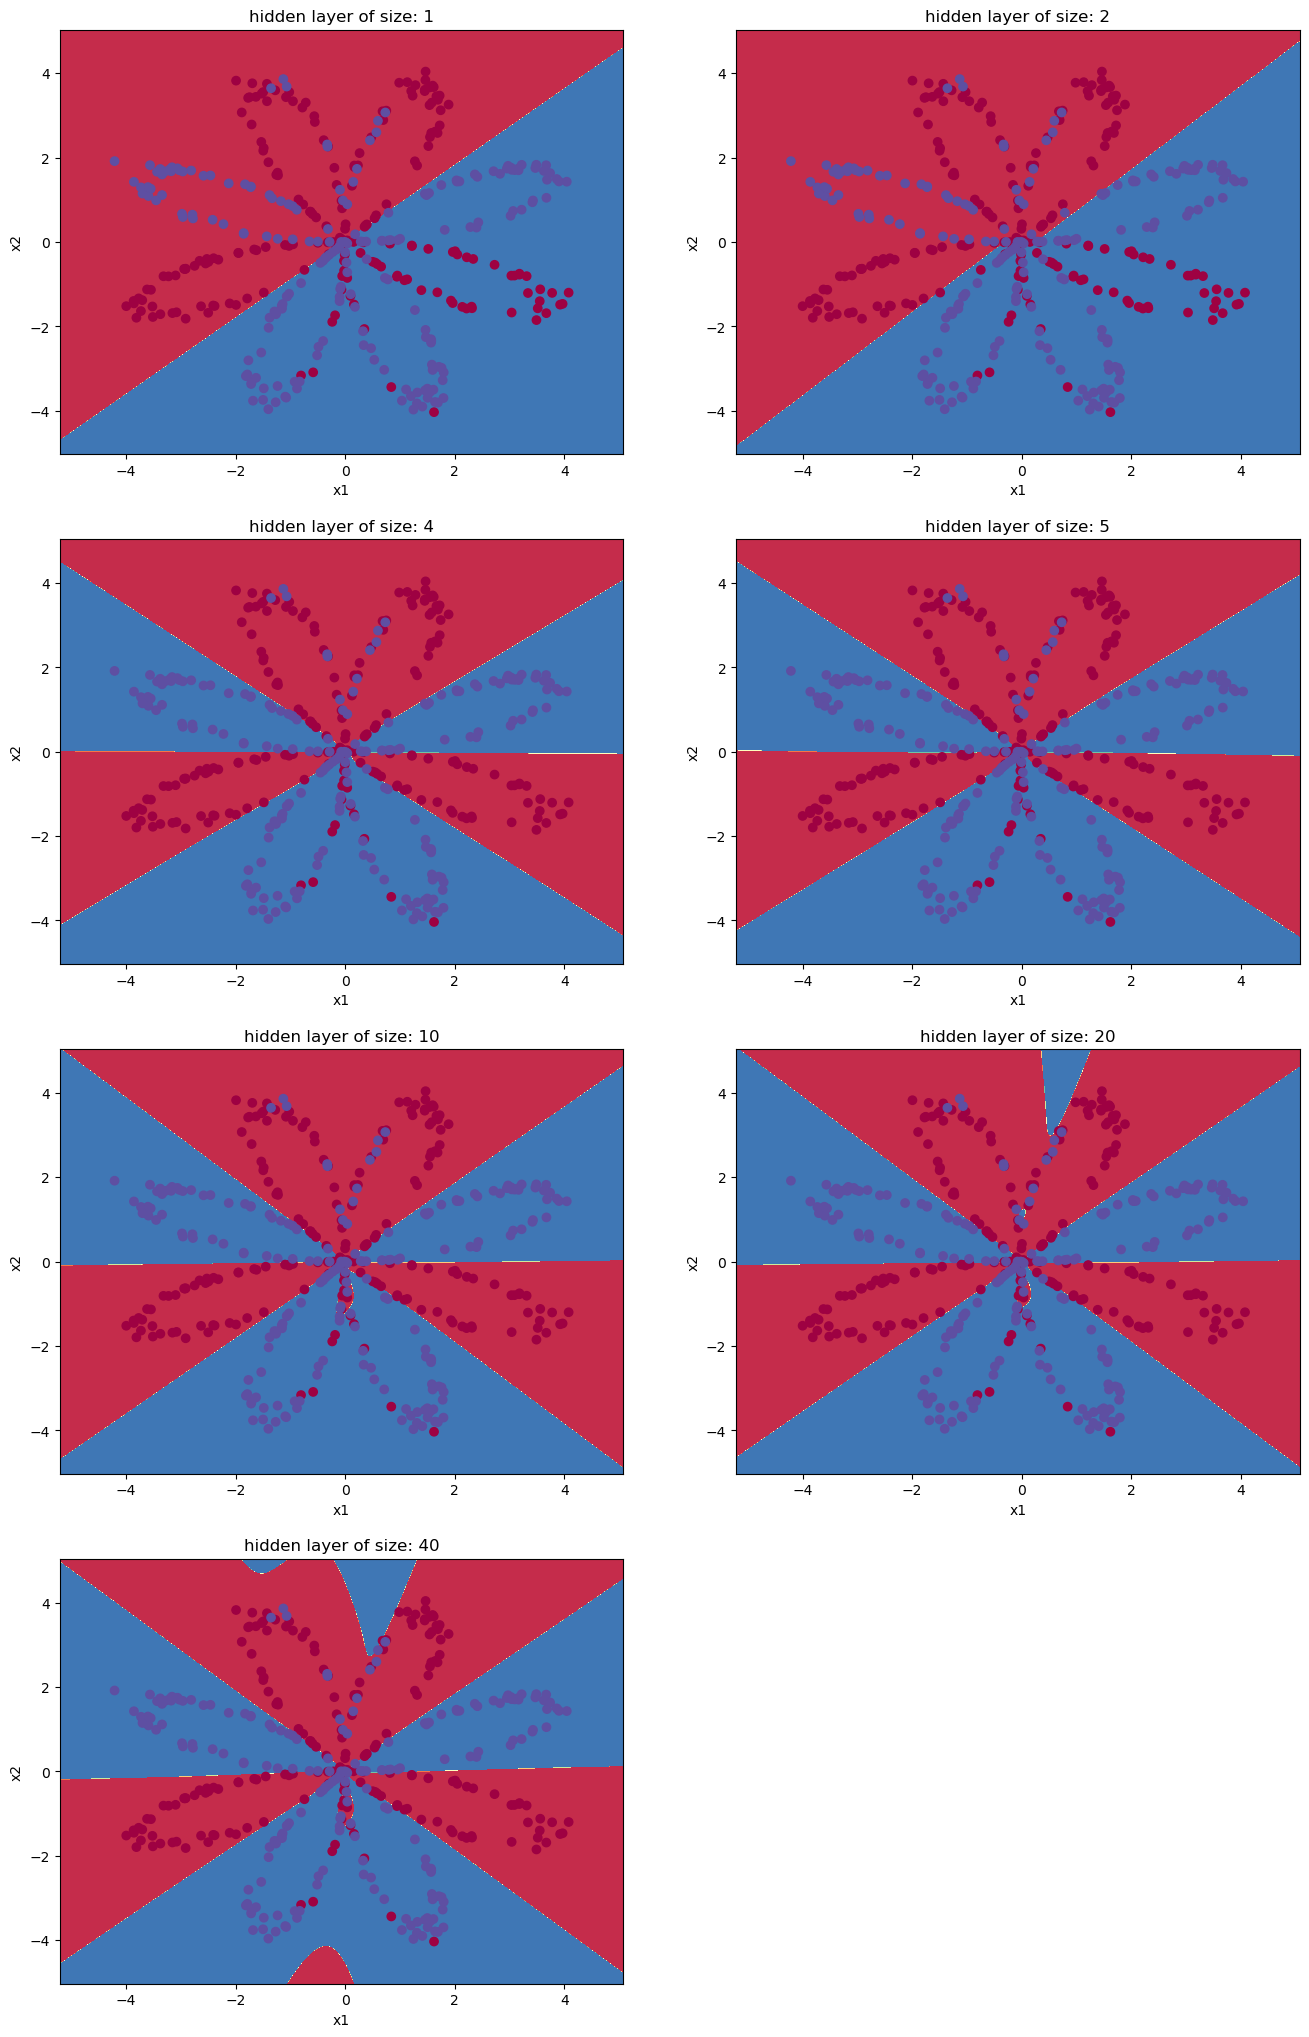

In [51]:
cross_validation_layer_size(hidden_layer_size, X, y)

In [52]:
# model of size 5 is a good enough accuracy measure fot the model
